In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Part 1

In [2]:
csv_file = "/Users/robertjost/Fall_2025/Biogeochemistry/dust_dataHW1.csv"

In [ ]:
# concentration is g / ml, flux is g / m^2 / yr.

dust_df = pd.read_csv(csv_file)


<h2 style="text-align: center;">Convert Concentration to a unitless term, assuming the density of water.</h2>

$$
\dfrac{Concentration}{density_{H_{2}0}} = \dfrac{mg}{L} \cdot \dfrac{1 \, g}{1000 \, mg} \cdot \dfrac{1000 \, L}{1 \, m^3} \cdot \dfrac{1 \, kg}{1000 \, g} \cdot \dfrac{1 \, m^3}{1000 \, kg}
$$


1. Convert P and Ca concentrations from mg * L-1 to g * m-3, which ends up being a one-to-one conversion. 
2. Convert the concentration to kg m-3. 
3. Divide the concentration with an assumed density of water to be 1e3 kg m-3.

Combining steps 2 and 3 results in a conversion factor of 1e6 which is used in the following cell.

In [4]:

dust_df["P_flux"] = (dust_df["P_conc"] /1000000) * dust_df["flux_gm2yr"]
dust_df["Ca_flux"] = (dust_df["Ca_conc"] /1000000) * dust_df["flux_gm2yr"]

In [5]:
# sort the dataframe according to the elevation gradient of the ecosystems
elevation_gradient = ["Plains", "Foothills", "Montane", "Subalpine", "Alpine"]

dust_df["Ecosystem"] = pd.Categorical(dust_df["Ecosystem"], categories=elevation_gradient, ordered=True)
dust_df_sorted = dust_df.sort_values(["Ecosystem", "Season"])
dust_df_sorted

,ID,Ecosystem,Season,P_conc,Ca_conc,flux_gm2yr,P_flux,Ca_flux
7,8,Plains,JAS,2007.50,9701.5,14.282538,0.028672,0.138562
4,5,Plains,MJ,2417.95,8247.0,15.986543,0.038655,0.131841
2,3,Foothills,FMA,1134.00,9418.0,6.999662,0.007938,0.065923
8,9,Foothills,JAS,2652.00,8372.5,9.707827,0.025745,0.081279
5,6,Foothills,MJ,3245.30,5843.0,21.734655,0.070535,0.126996
0,1,Foothills,NDJ,1028.00,10861.0,5.307173,0.005456,0.057641
3,4,Montane,FMA,1235.50,8839.5,7.370548,0.009106,0.065152
9,10,Montane,JAS,2813.00,7236.5,10.445604,0.029383,0.075590
6,7,Montane,MJ,3558.50,4760.5,12.983546,0.046202,0.061808
1,2,Montane,NDJ,778.00,7455.0,8.608287,0.006697,0.064175


In [6]:
seasons = dust_df.groupby("Season", observed=True)
ecosystem = dust_df.groupby("Ecosystem", observed=True)

In [7]:
# Plotting variables
marker_types = ['o', 's', '^', 'D', 'v']
season_order = ["NDJ", "FMA", "MJ", "JAS"]
font_labels = {'family': 'Arial', 'color': 'black', 'size': 14}
font_titles = {'family': 'Arial', 'color': 'black', 'size': 16}
# grouped bar chart
bar_width = 0.15
x = np.arange(len(season_order))

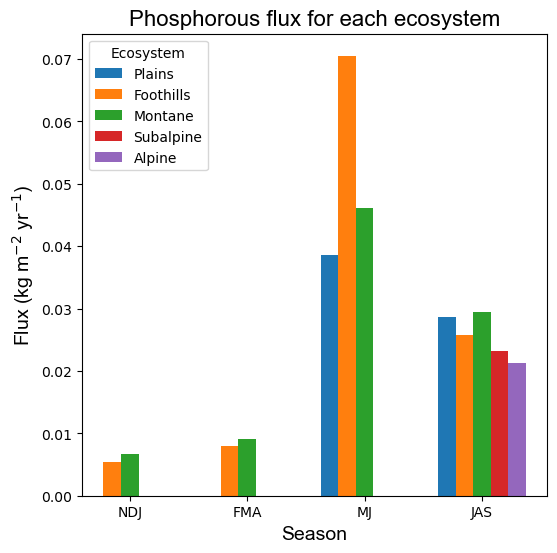

In [ ]:
# Figure 1 - Grouped bar chart for P
plt.figure(figsize=(6,6))
for idx, (name, group) in enumerate(ecosystem):
    group = group.set_index("Season").reindex(season_order).reset_index()
    plt.bar(x + idx * bar_width, group["P_flux"], width=bar_width, label=name)

plt.xlabel("Season", fontdict=font_labels)
plt.ylabel("Flux (kg m$^{-2}$ yr$^{-1}$)", fontdict=font_labels)
plt.title("Phosphorous flux for each ecosystem", fontdict=font_titles)
plt.xticks(x + bar_width * (len(list(ecosystem)) - 1) / 2, season_order)
plt.legend(title="Ecosystem", loc="upper left")
#plt.figtext(0, -0.005, P_caption, ha="left", fontsize=12)
plt.show()

​​Figure 1. Bar chart showing the mean phosphorus flux (kg m-2 yr) along the y-axis, measured over periods of 2-3 months along the x-axis (Seasons) at sites within distinct ecosystems along an elevation gradient increasing from Plains to Alpine. Dust collection sites were operational during all seasons at the Foothills and Montane sites while the Plains, Subalpine, and Alpine sites were operated during the spring (MJ) and summer (JAS) periods. Flux values are lowest during the winter months (NDJ & FMA) in the Foothills and Montane sites but then increase by two orders of magnitude during the spring (MJ). Most of the phosphorus is derived from plant pollen which explains the exponential increase in flux values from winter to spring followed by a reduction in the summer. The prevailing wind direction over this region shifts during the spring, switching from west to east. This shift in wind direction has considerable implications for dust deposition given this area’s location east of the continental divide. Easterly prevailing winds are more likely to interact with the surface and accumulate dust. The air mass is forced aloft over the divide and the dust remains suspended in the middle troposphere. The observed increase in dust flux during the spring and summer periods can be attributed to this shift in direction which happens to be downwind of the Plains ecosystem which is a substantial source of particulate matter due to industrial and agricultural land use.  


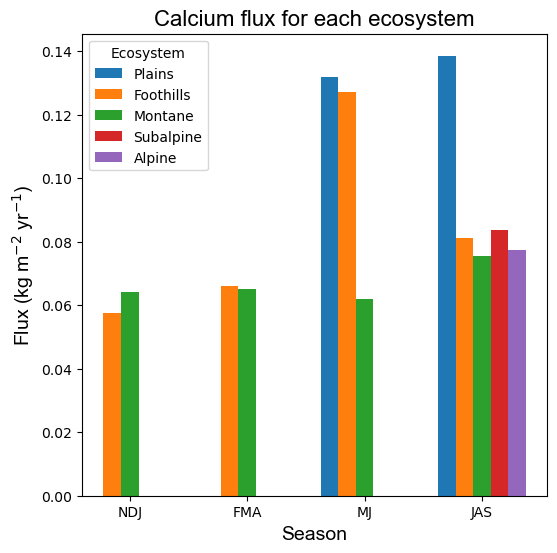

In [ ]:
# Figure 2 - Grouped bar chart for Ca
plt.figure(figsize=(6,6))
for idx, (name, group) in enumerate(ecosystem):
    group = group.set_index("Season").reindex(season_order).reset_index()
    plt.bar(x + idx * bar_width, group["Ca_flux"], width=bar_width, label=name)

plt.xlabel("Season", fontdict=font_labels)
plt.ylabel("Flux (kg m$^{-2}$ yr$^{-1}$)", fontdict=font_labels)
plt.title("Calcium flux for each ecosystem", fontdict=font_titles)
plt.xticks(x + bar_width * (len(list(ecosystem)) - 1) / 2, season_order)
plt.legend(title="Ecosystem", loc="upper left")
#plt.figtext(0, -0.005, Ca_caption, ha="left", fontsize=12)
plt.show()

Figure 2. Bar chart showing the mean calcium flux (kg m-2 yr) along the y-axis, measured over periods of 2-3 months along the x-axis (Seasons) at sites within distinct ecosystems along an elevation gradient increasing from Plains to Alpine. Dust collection sites were operational during all seasons at the Foothills and Montane sites while the Plains, Subalpine, and Alpine sites were operated during the spring (MJ) and summer (JAS) periods. Flux values are lowest during the winter months (NDJ & FMA) in the Foothills and Montane sites but then increase by one order of magnitude during the spring (MJ) and summer (JAS). In the plains and foothills ecosystems, calcium flux remains steady throughout the year. This suggests that the calcium fraction has a different source relative to phosphorus.

# Part 2

In [12]:
from IPython.display import display, Markdown
p_out = 1e-1 / 1e4
p_in = 2.3e-2 / 1e3
a_ws = 1e1 * 1e6

delta_p = a_ws * (p_in - p_out)
md_str = (f"The net change in Phosphorpous for this watershed is {delta_p} kg.")
display(Markdown(md_str))

The net change in Phosphorpous for this watershed is 130.0 kg.

1. Net positive annual storage of P could change NPP and algal biomass which would effect the whole subalpine ecosystem.
2. This equation integrates across the atmosphere, lithosphere, and hydrosphere, by assuming the primary input of phosphorous into the system is derived from dust which originated in the lithosphere then picked up by wind and transported in the atmosphere and then deposited into the hydrosphere (and other parts of the lithosphere).